In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
dataset = pd.read_csv("./train.csv")
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
X = dataset[['battery_power','dual_sim','int_memory','n_cores','ram']]
y = dataset.iloc[:,-1]

In [4]:
print("X:",X)
print("Y:",y)

X:       battery_power  dual_sim  int_memory  n_cores   ram
0               842         0           7        2  2549
1              1021         1          53        3  2631
2               563         1          41        5  2603
3               615         0          10        6  2769
4              1821         0          44        2  1411
...             ...       ...         ...      ...   ...
1995            794         1           2        6   668
1996           1965         1          39        4  2032
1997           1911         1          36        8  3057
1998           1512         0          46        5   869
1999            510         1          45        6  3919

[2000 rows x 5 columns]
Y: 0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [6]:
X_train.head()

,battery_power,dual_sim,int_memory,n_cores,ram
1738,511,1,24,3,2378
548,641,0,7,1,3595
936,805,0,34,6,3647
1389,1801,1,52,6,258
1607,744,1,33,4,2700


In [7]:
y_train.head()

1738    1
548     2
936     3
1389    0
1607    2
Name: price_range, dtype: int64

In [8]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [9]:
print("Cofficients:",model.coef_)
print("Thete0:",model.intercept_)

Cofficients: [ 0.00052384 -0.02758495  0.00075765  0.00452144  0.00094396]
Thete0: -1.1842260124946737


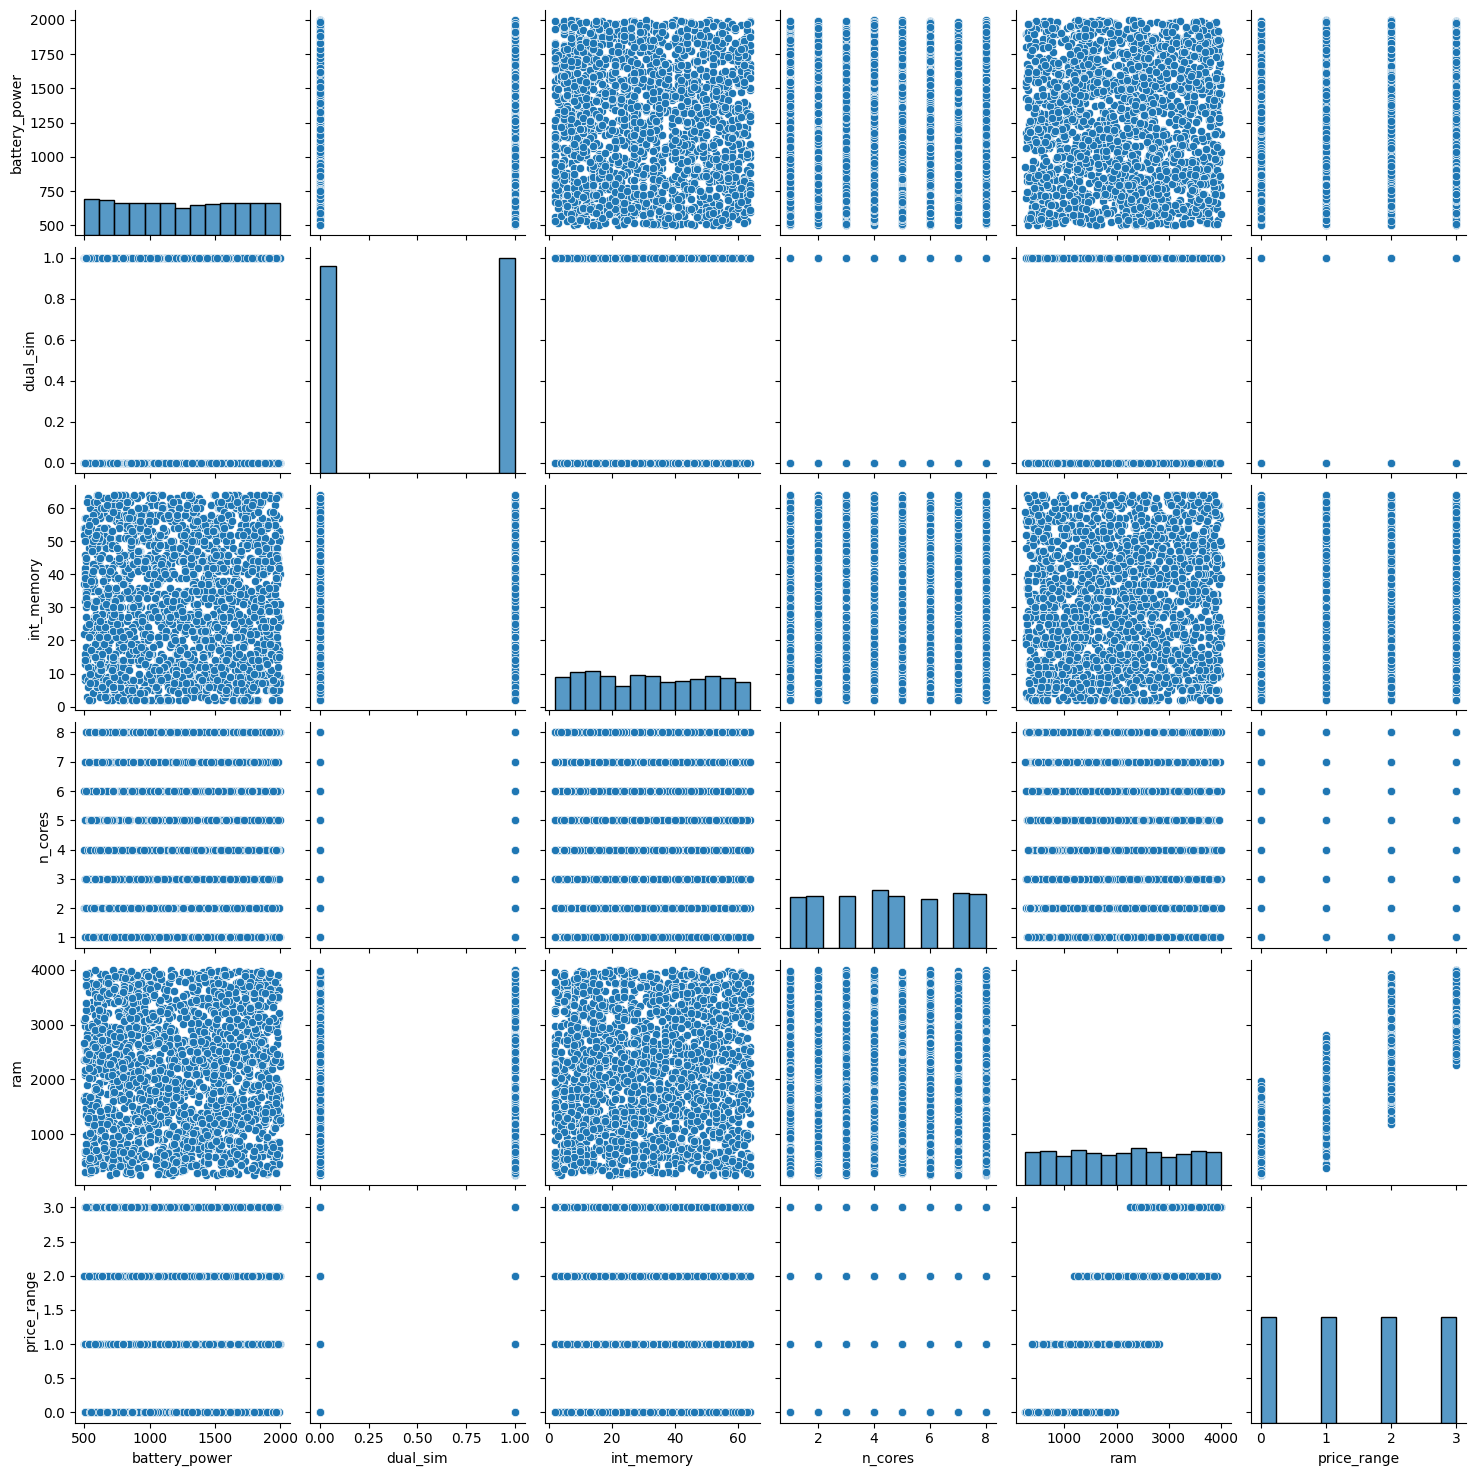

In [10]:
sns.pairplot(dataset[['battery_power','dual_sim','int_memory','n_cores','ram','price_range']])
plt.show()

In [11]:
predictions = model.predict(X_test)
predictions

array([ 3.53556730e-01,  1.89655616e+00,  1.13329674e+00,  3.03418937e+00,
        9.76089868e-01,  1.49462417e+00,  2.00902803e+00,  3.58493117e-01,
        2.33514536e+00,  1.10711211e+00,  1.55224414e-01,  7.99537693e-01,
        1.59845060e+00,  2.81262635e+00,  1.96855257e+00,  1.96383238e+00,
        3.22839690e+00,  3.43838910e+00,  1.08732718e+00, -8.12912504e-03,
        2.92196307e-01,  1.31277411e+00,  8.22696841e-01,  1.61678287e+00,
        5.24519629e-01,  7.78729221e-01,  2.62565745e+00,  1.97969076e+00,
        2.09698105e+00, -2.48706694e-01,  5.86862084e-01, -2.83124246e-01,
        3.25942145e+00,  4.22602166e-01,  1.34115138e+00,  1.26399680e+00,
        2.40787223e+00,  1.22179535e-01,  3.13897926e+00,  1.09452070e-01,
        1.81669342e+00,  2.40923909e+00,  1.77980086e+00, -3.18803548e-01,
        2.44202193e+00,  2.00674685e+00,  1.54506029e+00,  1.21610254e+00,
        2.80115189e+00,  7.26102920e-01,  2.84171919e+00,  1.20505371e+00,
        2.65290449e-02,  

In [12]:
MAE = mean_absolute_error(y_test,predictions)
print("Mean Absolute Error:",MAE)
RMSE = mean_squared_error(y_test,predictions)
print("Square Error:",RMSE)

Mean Absolute Error: 0.3224465063565996
Square Error: 0.15934935492902502


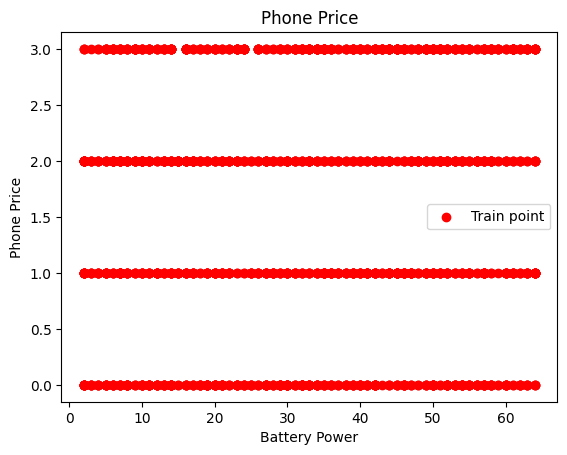

In [13]:
plt.scatter(X_train['int_memory'],y_train,color='red',label='Train point')
# plt.scatter(X_test['int_memory'],y_test,color='green',label='Test Point')
# plt.plot(X_train,y_train,color='blue',linewidth=2,label='Regression')
plt.title('Phone Price')
plt.xlabel('Battery Power')
plt.ylabel('Phone Price')
plt.legend()
plt.show()

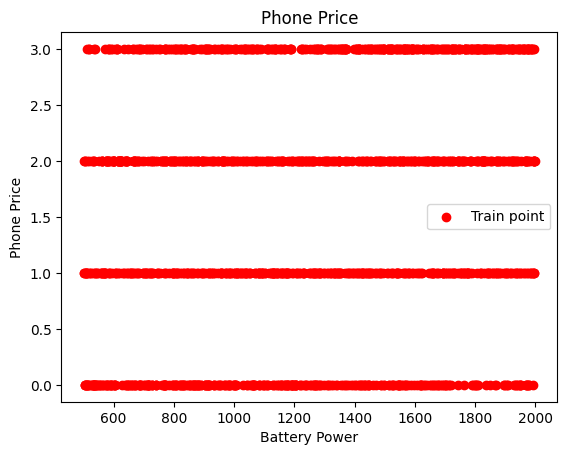

In [14]:
plt.scatter(X_train['battery_power'],y_train,color='red',label='Train point')
# plt.scatter(X_test['int_memory'],y_test,color='green',label='Test Point')
# plt.plot(X_train,y_train,color='blue',linewidth=2,label='Regression')
plt.title('Phone Price')
plt.xlabel('Battery Power')
plt.ylabel('Phone Price')
plt.legend()
plt.show()

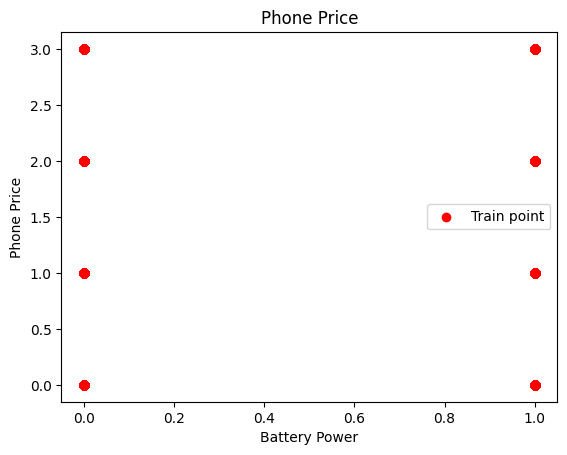

In [15]:
plt.scatter(X_train['dual_sim'],y_train,color='red',label='Train point')
# plt.scatter(X_test['int_memory'],y_test,color='green',label='Test Point')
# plt.plot(X_train,y_train,color='blue',linewidth=2,label='Regression')
plt.title('Phone Price')
plt.xlabel('Battery Power')
plt.ylabel('Phone Price')
plt.legend()
plt.show()

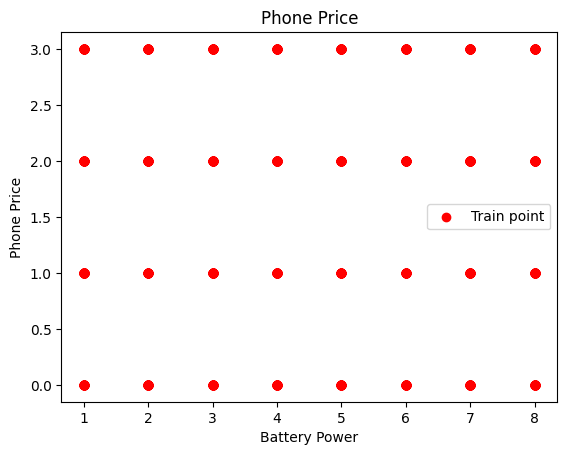

In [16]:
plt.scatter(X_train['n_cores'],y_train,color='red',label='Train point')
# plt.scatter(X_test['int_memory'],y_test,color='green',label='Test Point')
# plt.plot(X_train,y_train,color='blue',linewidth=2,label='Regression')
plt.title('Phone Price')
plt.xlabel('Battery Power')
plt.ylabel('Phone Price')
plt.legend()
plt.show()

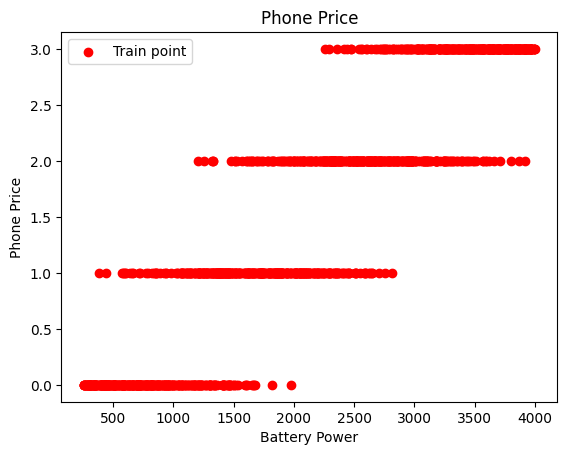

In [17]:
plt.scatter(X_train['ram'],y_train,color='red',label='Train point')
# plt.scatter(X_test['int_memory'],y_test,color='green',label='Test Point')
# plt.plot(X_train,y_train,color='blue',linewidth=2,label='Regression')
plt.title('Phone Price')
plt.xlabel('Battery Power')
plt.ylabel('Phone Price')
plt.legend()
plt.show()

In [18]:
dataset_test = pd.read_csv("./test.csv")
x_test = dataset_test[['battery_power','dual_sim','int_memory','n_cores','ram']]
x_test

,battery_power,dual_sim,int_memory,n_cores,ram
0,1043,1,5,3,3476
1,841,1,61,5,3895
2,1807,0,27,3,2396
3,1546,1,25,8,3893
4,1434,0,49,6,1773
...,...,...,...,...,...
995,1700,0,54,7,2121
996,609,1,13,4,1933
997,1185,0,8,1,1223
998,1533,1,50,2,2509


In [19]:
x_test_predictions = model.predict(x_test)
len(x_test_predictions)

1000

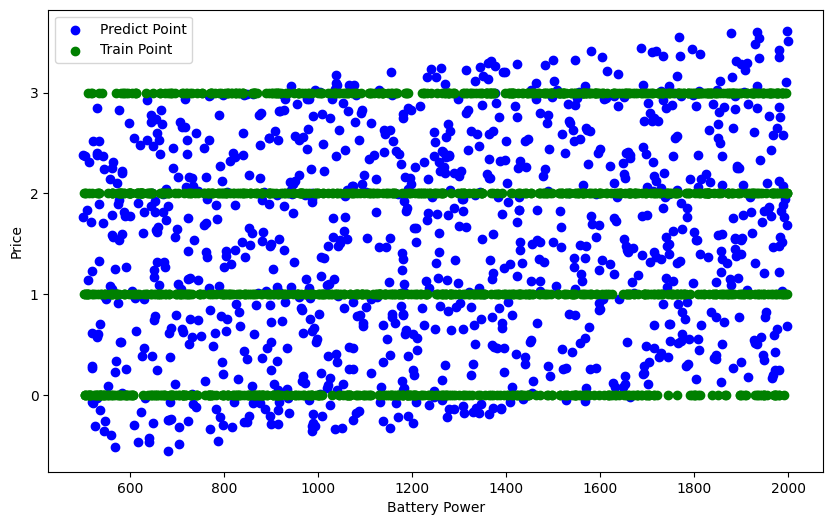

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(x_test['battery_power'],x_test_predictions,color='blue',label='Predict Point')
plt.scatter(X_train['battery_power'],y_train,color='green',label='Train Point')
# plt.plot(x_test['battery_power'],x_test_predictions,linewidth=3,label='Multiple Regressoin',color='red')
plt.xlabel('Battery Power')
plt.ylabel('Price')
plt.legend()
plt.show()

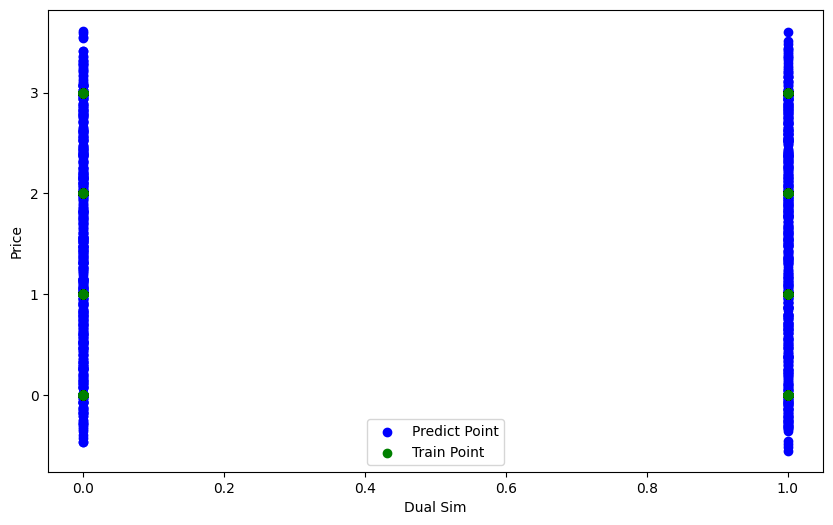

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(x_test['dual_sim'],x_test_predictions,color='blue',label='Predict Point')
plt.scatter(X_train['dual_sim'],y_train,color='green',label='Train Point')
# plt.plot(x_test['battery_power'],x_test_predictions,linewidth=3,label='Multiple Regressoin',color='red')
plt.xlabel('Dual Sim')
plt.ylabel('Price')
plt.legend()
plt.show()

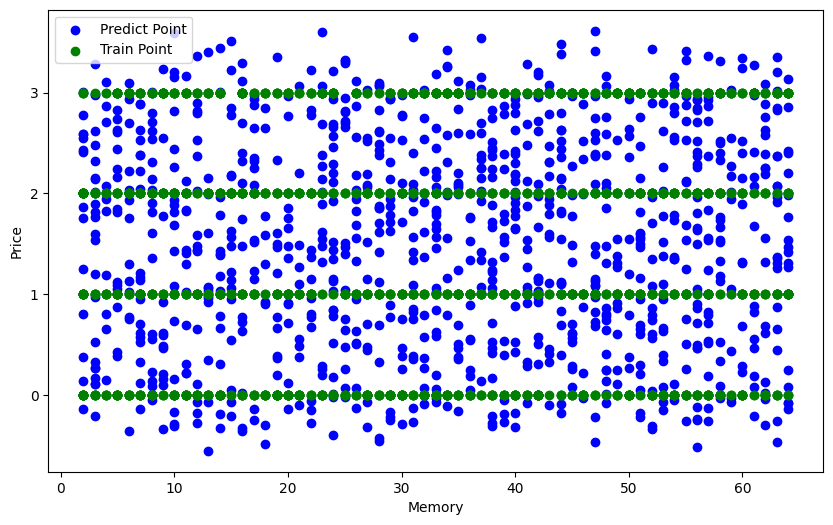

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(x_test['int_memory'],x_test_predictions,color='blue',label='Predict Point')
plt.scatter(X_train['int_memory'],y_train,color='green',label='Train Point')
# plt.plot(x_test['battery_power'],x_test_predictions,linewidth=3,label='Multiple Regressoin',color='red')
plt.xlabel('Memory')
plt.ylabel('Price')
plt.legend()
plt.show()

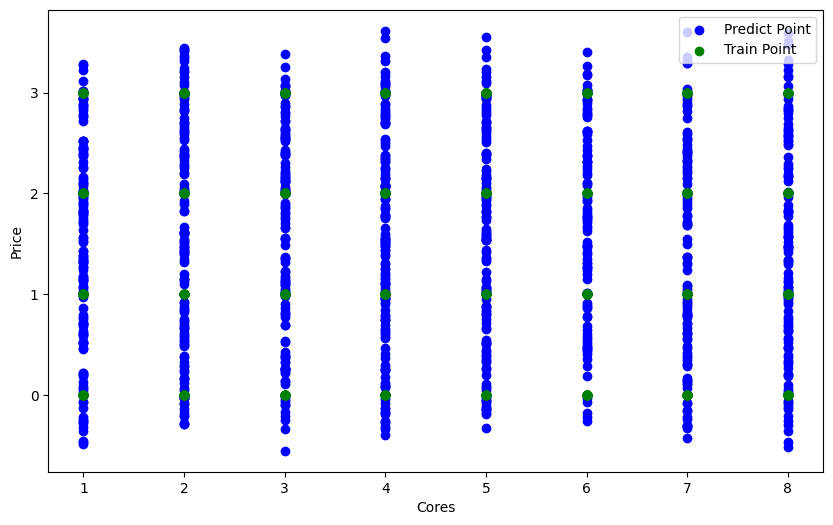

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(x_test['n_cores'],x_test_predictions,color='blue',label='Predict Point')
plt.scatter(X_train['n_cores'],y_train,color='green',label='Train Point')
# plt.plot(x_test['battery_power'],x_test_predictions,linewidth=3,label='Multiple Regressoin',color='red')
plt.xlabel('Cores')
plt.ylabel('Price')
plt.legend()
plt.show()

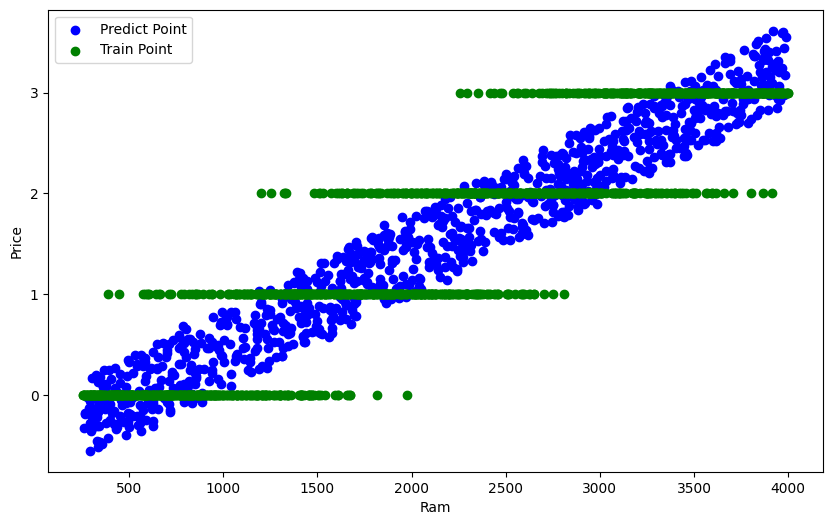

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(x_test['ram'],x_test_predictions,color='blue',label='Predict Point')
plt.scatter(X_train['ram'],y_train,color='green',label='Train Point')
# plt.plot(x_test['battery_power'],x_test_predictions,linewidth=3,label='Multiple Regressoin',color='red')
plt.xlabel('Ram')
plt.ylabel('Price')
plt.legend()
plt.show()